Q1.

The human brain comprises distinct anatomical components, each endowed with specialized functionalities:

a. Cerebrum: This region is accountable for the execution of advanced cognitive functions, encompassing processes such as deliberative thought, memory retention, and the initiation of voluntary actions.

b. Cerebellum: Tasked with the coordination of voluntary movements, maintenance of posture, and preservation of balance within the organism.

c. Brainstem: Serving as a regulatory center, the brainstem governs fundamental life processes, including but not limited to respiration, cardiac pulsation, and rudimentary reflex actions.

d. Hippocampus: Functioning predominantly in the facilitation of memory formation and participation in spatial navigation tasks.

e. Amygdala: Playing a pivotal role, the amygdala is engaged in the processing of emotions and the retention of emotional memories.


Q2.

In neurons, the cellular membrane encompasses a variety of ion channels, which are categorized as follows:

a. Sodium (Na+) channels: These channels facilitate the influx of sodium ions into the cell.

b. Potassium (K+) channels: These channels allow the efflux of potassium ions from the cell.

c. Chloride (Cl-) channels: These channels enable the movement of chloride ions across the cellular membrane.

d. The maintenance of the Resting Membrane Potential (RMP) is managed by the sodium-potassium pump. This pump actively transports sodium out of the cell and potassium into the cell, acting against their respective concentration gradients.


Q3.

Equilibrium Potential:

The equilibrium potential is the electrical charge a specific ion needs to reach so that it doesn't move anymore. This balance is closely related to both the ion's concentration gradient and the current membrane potential. Understanding the equilibrium potential helps us learn about the forces that control how ions are spread across the cell membrane.


Resting Membrane Potential:

On the other hand, the resting membrane potential is the electrical charge across the cell membrane when the neuron is not active, usually around -70 millivolts. This resting state is a dynamic balance influenced by many factors, especially how much the membrane lets different ions pass through. The resting membrane potential is a basic measure for understanding the neuron’s electrical state when it’s not active.

Q4.
The stages involved in the attainment of action potential by a neuron are explained below

Resting State:
At the start of the action potential process, the neuron is in a polarized state with a negative resting membrane potential. This resting state is the starting point for any changes in the membrane potential.

Depolarization:
When the neuron gets a stimulus, it undergoes depolarization. This happens when sodium channels open, letting Na+ ions into the neuron. As a result, the neuron's membrane potential shifts towards a positive state from its negative resting state.

Threshold:
A key point in the depolarization phase is reaching the threshold. This threshold is the point where depolarization is strong enough to start an action potential. It plays a crucial role in the progression of the neuron's excitation process.

Rising Phase:
After surpassing the threshold, the neuron enters the rising phase of the action potential. This stage is marked by a quick influx of sodium ions, leading to a significant increase in the membrane potential. The positive feedback loop established during this phase further pushes the progression towards a positive membrane potential.

Falling Phase:
As the rising phase reaches its peak, the action potential moves into the falling phase. At this point, sodium channels slowly close, while potassium channels open at the same time. This sequence of events ends in repolarization, where the membrane potential returns to a negative state.

Undershoot:
After the repolarization phase, there's a short period of hyperpolarization, known as the undershoot. During this brief state, the membrane potential temporarily becomes more negative before finally stabilizing and returning to the resting potential. The undershoot phase marks the end of the action potential, getting the neuron ready for future excitatory events.

Q5.

Depolarization: 
Depolarization is when the cell's electrical charge becomes more positive. This change mainly happens because sodium ions enter the cell through special channels. 

Repolarization: 
Unlike depolarization, repolarization is when the cell's electrical charge goes back to its normal state. This usually happens because potassium ions leave the cell. 

Hyperpolarization: 
Hyperpolarization is when the cell's electrical charge becomes more negative than its normal state. This often happens because too many potassium ions leave the cell or too many chloride ions enter the cell. 

Ion Channels Involved: 
A big part of understanding these events is knowing which ion channels are involved in each one. During depolarization, sodium channels play a big role by letting sodium ions enter the cell. During repolarization, potassium channels are important because they let potassium ions leave the cell. Hyperpolarization involves chloride channels, which either let chloride ions enter the cell or stop them from leaving.


Q6- outputs of (a), (b), (c) plotted below

Firing times for experiment 1: []


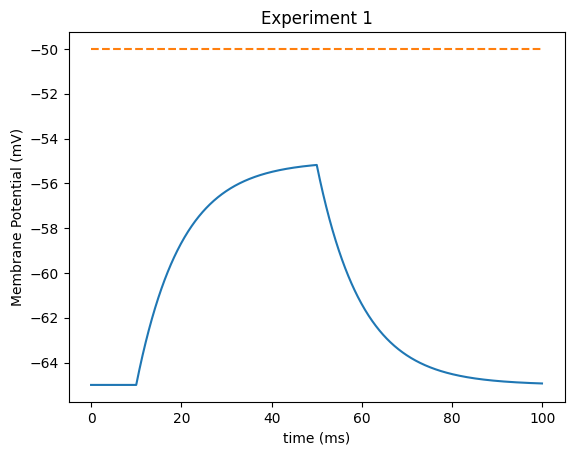

Firing times for experiment 2: [23.900000000000002, 41.300000000000004]


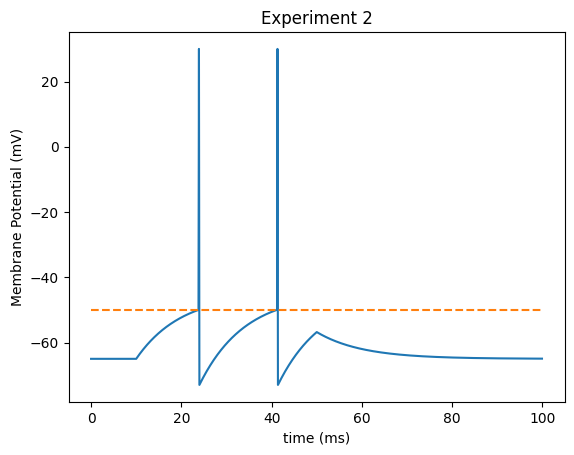

Firing times for experiment 3: [17.0, 26.5, 36.0, 45.5]


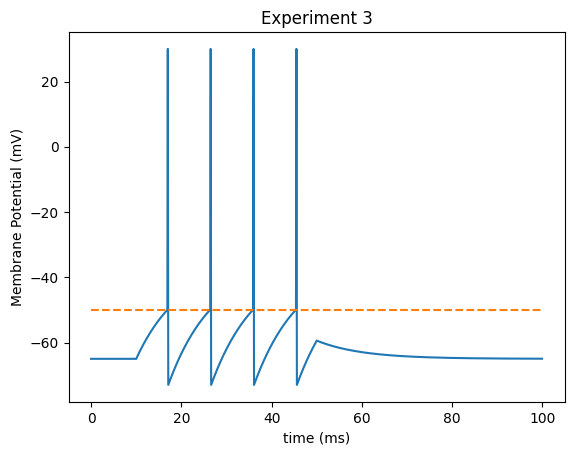

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def LIF(V0, I, Vth, R, tau, V_spike, V_reset, step_size, t):
    Vm = np.zeros(len(t))
    Vm[0] = V0
    firing_times = []
    iter = 1
    while iter < len(t):
        if Vm[iter-1] >= Vth:
            Vm[iter] = V_spike
            Vm[iter+1] = V_reset
            firing_times.append(t[iter])
            iter = iter + 2
        else:
            Vm[iter] = Vm[iter-1] + step_size * (((V0 - Vm[iter-1]) / tau) + I[iter-1] * R / tau)
            iter = iter + 1
    return Vm, firing_times


# Parameters for each experiment
params = [
    {"R": 10, "tau": 10, "V0": -65, "Vth": -50, "V_spike": 30, "V_reset": -73, "step_size": 0.1, "I_amp": 1},
    {"R": 10, "tau": 10, "V0": -65, "Vth": -50, "V_spike": 30, "V_reset": -73, "step_size": 0.1, "I_amp": 2},
    {"R": 10, "tau": 10, "V0": -65, "Vth": -50, "V_spike": 30, "V_reset": -73, "step_size": 0.1, "I_amp": 3}
]

for i, param in enumerate(params):
    t = np.arange(0, 100, param["step_size"])
    I = np.zeros(len(t))
    I[int(10/param["step_size"]):int(50/param["step_size"])] = param["I_amp"]

    # Call the LIF function
    Vm, firing_times = LIF(param["V0"], I, param["Vth"], param["R"], param["tau"], param["V_spike"], param["V_reset"], param["step_size"], t)

    # Print the firing times
    print(f"Firing times for experiment {i+1}: {firing_times}")

    # Plot the results
    plt.figure(i)
    plt.plot(t, Vm)
    plt.plot(t, param["Vth"]*np.ones(len(t)), '--')
    plt.xlabel("time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(f"Experiment {i+1}")
    plt.show()




(d)
The firing time of the neuron decreases as the strength of the current increases. This means that the neuron fires more frequently when the current is stronger.

Based on the outcomes of experiments 2 and 3, it appears that as the strength of the input current increases, the neuron fires more frequently. In other words, the time intervals between successive firings (also known as the inter-spike intervals) decrease with increasing current strength. 

This is evident from the fact that in experiment 2 (with 2nA current), the neuron fired twice, while in experiment 3 (with 3nA current), the neuron fired four times within the same time period. Thus, the firing frequency of the neuron is directly proportional to the strength of the input current.

(e) with varying tau values with constant input current with amplitude 3nA taken, done below

Firing times for experiment 1 with tau=10: [17.0, 26.5, 36.0, 45.5]
Interspike intervals for experiment 1 with tau=10: [9.5 9.5 9.5]
Firing rate for experiment 1 with tau=10: 0.04004004004004004 Hz


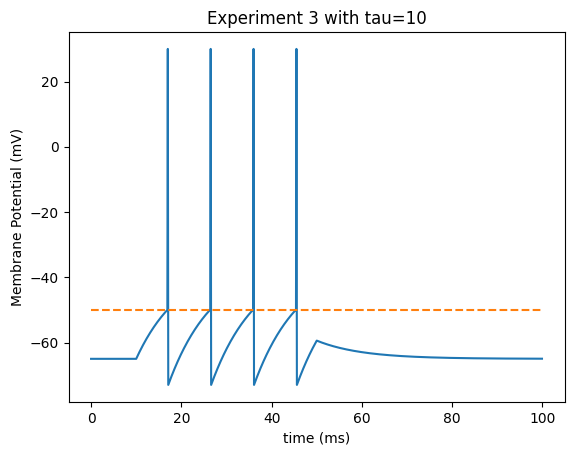

Firing times for experiment 2 with tau=20: [24.0, 42.800000000000004]
Interspike intervals for experiment 2 with tau=20: [18.8]
Firing rate for experiment 2 with tau=20: 0.02002002002002002 Hz


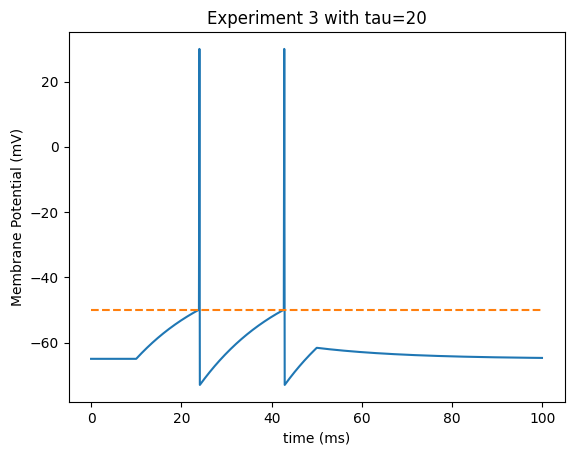

Firing times for experiment 3 with tau=30: [30.900000000000002]
Interspike intervals for experiment 3 with tau=30: []
Firing rate for experiment 3 with tau=30: 0.01001001001001001 Hz


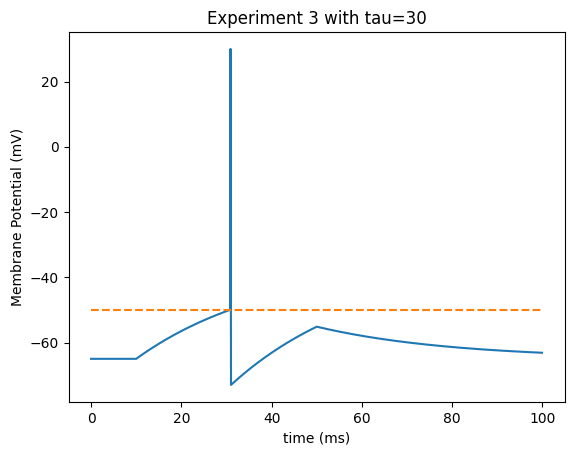

In [54]:
def experiment_with_tau(LIF, params, tau_values):
    for i, tau in enumerate(tau_values):
        # Copy the original parameters and update tau
        new_params = params.copy()
        new_params["tau"] = tau

        t = np.arange(0, 100, new_params["step_size"])
        I = np.zeros(len(t))
        I[int(10/new_params["step_size"]):int(50/new_params["step_size"])] = new_params["I_amp"]

        # Call the LIF function
        Vm, firing_times = LIF(new_params["V0"], I, new_params["Vth"], new_params["R"], new_params["tau"], new_params["V_spike"], new_params["V_reset"], new_params["step_size"], t)

        # Print the firing times
        print(f"Firing times for experiment {i+1} with tau={tau}: {firing_times}")

        # Calculate and print the interspike intervals and firing rate
        interspike_intervals = np.diff(firing_times)
        firing_rate = len(firing_times) / (t[-1] - t[0])
        print(f"Interspike intervals for experiment {i+1} with tau={tau}: {interspike_intervals}")
        print(f"Firing rate for experiment {i+1} with tau={tau}: {firing_rate} Hz")

        # Plot the results
        plt.figure(i)
        plt.plot(t, Vm)
        plt.plot(t, new_params["Vth"]*np.ones(len(t)), '--')
        plt.xlabel("time (ms)")
        plt.ylabel("Membrane Potential (mV)")
        plt.title(f"Experiment 3 with tau={tau}")
        plt.show()

# Parameters for the original experiment
original_params = {"R": 10, "tau": 10, "V0": -65, "Vth": -50, "V_spike": 30, "V_reset": -73, "step_size": 0.1, "I_amp": 3}

# Tau values for the new experiments
tau_values = [10, 20, 30]

# Conduct the experiments with varying tau
experiment_with_tau(LIF, original_params, tau_values)


(f) experimented a bit with different input currents, constant(of amplitude 3nA), sinusoidal(oscillating between -3nA and +3nA) and random(random sequence of values between 0 and 3nA)

Firing times for experiment 1: [7.0, 16.5, 26.0, 35.5, 45.0, 54.5, 64.0, 73.5, 83.0, 92.5]
Interspike intervals for experiment 1: [9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5]
Firing rate for experiment 1: 0.10010010010010009 Hz


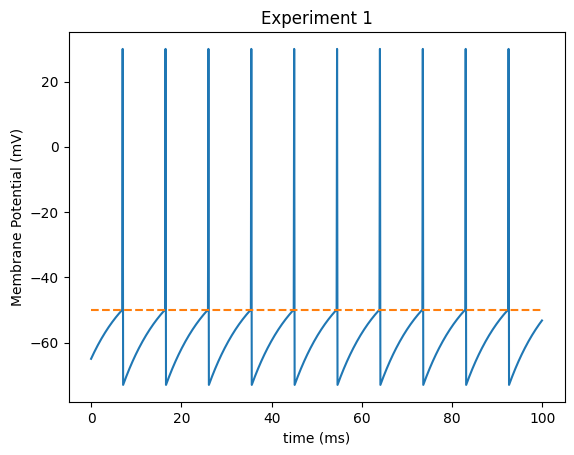

Firing times for experiment 2: [17.3, 27.1, 40.1]
Interspike intervals for experiment 2: [ 9.8 13. ]
Firing rate for experiment 2: 0.03003003003003003 Hz


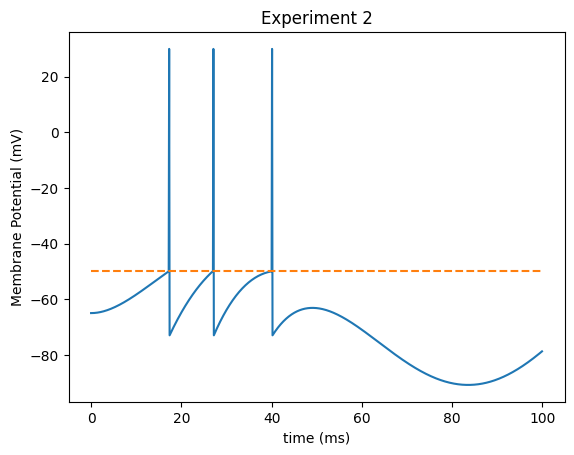

Firing times for experiment 3: [34.4, 64.60000000000001]
Interspike intervals for experiment 3: [30.2]
Firing rate for experiment 3: 0.02002002002002002 Hz


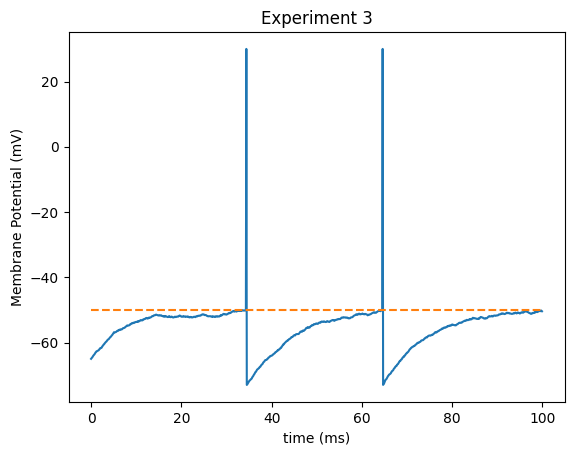

In [55]:
import numpy as np

def experiment_with_inputs(LIF, params, inputs):
    for i, I in enumerate(inputs):
        # Copy the original parameters
        new_params = params.copy()

        t = np.arange(0, 100, new_params["step_size"])

        # Call the LIF function
        Vm, firing_times = LIF(new_params["V0"], I, new_params["Vth"], new_params["R"], new_params["tau"], new_params["V_spike"], new_params["V_reset"], new_params["step_size"], t)

        # Print the firing times
        print(f"Firing times for experiment {i+1}: {firing_times}")

        # Calculate and print the interspike intervals and firing rate
        interspike_intervals = np.diff(firing_times)
        firing_rate = len(firing_times) / (t[-1] - t[0])
        print(f"Interspike intervals for experiment {i+1}: {interspike_intervals}")
        print(f"Firing rate for experiment {i+1}: {firing_rate} Hz")

        # Plot the results
        plt.figure(i)
        plt.plot(t, Vm)
        plt.plot(t, new_params["Vth"]*np.ones(len(t)), '--')
        plt.xlabel("time (ms)")
        plt.ylabel("Membrane Potential (mV)")
        plt.title(f"Experiment {i+1}")
        plt.show()

# Parameters for the original experiment
original_params = {"R": 10, "tau": 10, "V0": -65, "Vth": -50, "V_spike": 30, "V_reset": -73, "step_size": 0.1, "I_amp": 3}

# Different kinds of inputs
t = np.arange(0, 100, original_params["step_size"])
I_constant = original_params["I_amp"] * np.ones(len(t))
I_sinusoidal = original_params["I_amp"] * np.sin(2 * np.pi * t / 100)
I_random = original_params["I_amp"] * np.random.rand(len(t))
inputs = [I_constant, I_sinusoidal, I_random]

# Conduct the experiments with different inputs
experiment_with_inputs(LIF, original_params, inputs)
